# <center style="color: red"> COLOR COMPRESSION USING GMM</center>

- Sinh viên: Phan Thanh An
- Mã số sinh viên: 21127003
- Lớp: 21CLC07

## Mục lục
* [1. Mô tả thuật toán GMM](#c1)
* [2. Cài đặt thuật toán sử dụng sklearn](#c2)
* [3. Ưu nhược điểm của thuật toán](#c3)
* [4. So sánh với K-means](#c4)


##  <a class="anchor" id="c1">1. Mô tả thuật toán GMM </a>

Gaussian Mixture Model (GMM) là một mô hình xác suất sử dụng trong lĩnh vực học không giám sát để mô hình hóa dữ liệu dưới dạng tổng hợp của nhiều phân phối Gaussian (hoặc phân phối hỗn hợp). GMM thường được sử dụng để phân cụm dữ liệu và mô tả sự phân tán của các điểm dữ liệu trong không gian đa chiều.
- Khởi tạo tham số: Đầu tiên, chúng ta khởi tạo các tham số ban đầu cho các phân phối Gaussian. Các tham số bao gồm trọng số (weight) của mỗi phân phối, vector trung bình (mean) của mỗi phân phối và ma trận hiệp phương sai (covariance matrix) của mỗi phân phối.

- Expectation-Maximization (EM) Algorithm: Sau khi có các tham số ban đầu, chúng ta sử dụng thuật toán EM để cập nhật các tham số này một cách lặp đi lặp lại.

    - a. Expectation Step (E-Step): Trong bước này, chúng ta tính các giá trị xác suất thuộc về từng phân phối Gaussian cho mỗi điểm dữ liệu. Cụ thể, tính xác suất có điều kiện P(cluster k | data point i) dựa trên các tham số hiện tại.

    - b. Maximization Step (M-Step): Trong bước này, chúng ta cập nhật các tham số của các phân phối Gaussian dựa trên xác suất được tính ở bước E-Step. Cụ thể, chúng ta cập nhật trọng số, vector trung bình và ma trận hiệp phương sai của từng phân phối Gaussian.

- Kiểm tra điều kiện dừng: Chúng ta kiểm tra xem liệu sự thay đổi của các tham số sau mỗi lần cập nhật có đủ nhỏ để kết thúc quá trình EM hay không. Nếu các tham số không thay đổi đáng kể, ta kết thúc quá trình và coi các tham số đã hội tụ.

- Gán nhãn dữ liệu: Sau khi quá trình EM kết thúc, chúng ta có các tham số tốt nhất cho các phân phối Gaussian. Chúng ta sử dụng các tham số này để tính xác suất thuộc về từng phân phối cho mỗi điểm dữ liệu và gán nhãn dữ liệu bằng cách chọn phân phối có xác suất cao nhất.

##  <a class="anchor" id="c2">2. Cài đặt thuật toán sử dụng ```sklearn```</a>


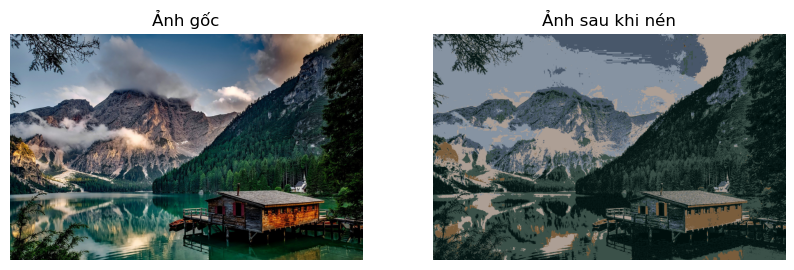

In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
from PIL import Image
import matplotlib.pyplot as plt

def compress_image(input_image_path, n_colors):
    # Đọc ảnh gốc và chuyển thành mảng pixel RGB
    image = Image.open(input_image_path)
    pixels = np.array(image)

    # Chuẩn bị dữ liệu để phân cụm
    height, width, channels = pixels.shape
    pixel_list = pixels.reshape((height * width, channels))

    # Phân cụm GMM
    gmm = GaussianMixture(n_components=n_colors, random_state=0)
    labels = gmm.fit_predict(pixel_list)

    # Tìm các điểm trung tâm của các cụm
    cluster_centers = gmm.means_.astype(int)

    # Thay thế màu
    compressed_pixels = np.array([cluster_centers[labels[i]] for i in range(height * width)])
    compressed_image = compressed_pixels.reshape((height, width, channels))

    # Tạo ảnh mới từ mảng pixel đã nén
    compressed_image = Image.fromarray(np.uint8(compressed_image))

    # Hiển thị ảnh gốc và ảnh sau khi nén
    plt.figure(figsize=(10, 5))
    
    # Hiển thị ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Ảnh gốc')
    plt.axis('off')

    # Hiển thị ảnh sau khi nén
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title('Ảnh sau khi nén')
    plt.axis('off')

    plt.show()

input_image_path = 'images/img_test_2.jpg'
compress_image(input_image_path, n_colors = 7)

 <b>Kết quả chạy thử với ```n_colors=7``` cho ra kết quả với độ nhiễu màu nhiều hơn so với K-means</b>

##  <a class="anchor" id="c3">3. Ưu nhược điểm của thuật toán </a>

#### Ưu điểm của GMM trong bài toán nén ảnh:

- Mô hình hóa linh hoạt: GMM có thể mô hình hóa dữ liệu có phân phối không đồng nhất và phức tạp hơn. Điều này làm cho GMM phù hợp với nhiều loại dữ liệu, đặc biệt là dữ liệu ảnh có nhiều sắc thái màu sắc khác nhau.

- Tính xác suất: GMM cung cấp xác suất thuộc về từng phân phối Gaussian cho mỗi điểm dữ liệu, điều này làm cho nó linh hoạt trong việc lựa chọn các phân phối phù hợp cho từng vùng trong ảnh.

- Có khả năng phân cụm không cần biết số lượng cụm trước: GMM không yêu cầu biết trước số lượng cụm cần phân cụm, do đó nó có thể tìm ra số lượng cụm phù hợp cho từng vùng trong ảnh.

#### Nhược điểm của GMM trong bài toán nén ảnh:

- Tốn tài nguyên tính toán: GMM là một mô hình phức tạp và tính toán các tham số của các phân phối Gaussian có thể tốn nhiều thời gian và tài nguyên tính toán, đặc biệt với dữ liệu lớn.

- Cần nhiều dữ liệu huấn luyện: Đối với GMM, việc tìm các tham số tốt nhất của các phân phối Gaussian yêu cầu có một lượng dữ liệu huấn luyện đủ lớn và đa dạng. Nếu không có đủ dữ liệu, khả năng mô hình hóa sẽ bị hạn chế và có thể dẫn đến kết quả nén ảnh không tốt.

- Không xử lý hiệu quả các kiểu dữ liệu không phải là phân phối Gaussian: Mặc dù GMM linh hoạt trong việc mô hình hóa phân phối không đồng nhất, nhưng nó không xử lý hiệu quả các kiểu dữ liệu không phải là phân phối Gaussian mà có thể tồn tại trong dữ liệu ảnh.

- Nhạy cảm với các điểm nhiễu: GMM có thể nhạy cảm với các điểm dữ liệu nhiễu, đặc biệt là khi số lượng cụm là lớn hoặc dữ liệu không đồng nhất. Các điểm dữ liệu nhiễu có thể làm ảnh hưởng đến quá trình phân cụm và làm cho kết quả nén ảnh không tốt.

##  <a class="anchor" id="c4">4. So sánh với K-means </a>
Trong nhiều trường hợp, K-means thường nhanh hơn GMM. Dưới đây là một số lý do cho điều này:

#### 1. Tính chất tính toán:
- K-means: K-means dựa vào tính toán trung bình và di chuyển các điểm dữ liệu trong các cụm cho đến khi đạt được điều kiện dừng (ví dụ: sự thay đổi giữa các lần lặp nhỏ hơn ngưỡng).
- GMM: GMM sử dụng phương pháp Expectation-Maximization (EM) để ước lượng các tham số của các phân phối Gaussian. Phương pháp này yêu cầu tính toán xác suất dự đoán cho mỗi điểm dữ liệu trong mỗi lần lặp.
#### 2. Số lượng tham số:

- K-means: K-means chỉ cần tính toán các trung tâm cụm, mỗi trung tâm có thể được coi như một tham số.
- GMM: GMM phải ước lượng trọng số, trung bình và ma trận hiệp phương sai của các phân phối Gaussian cho mỗi cụm. Việc ước lượng này tốn nhiều tài nguyên tính toán hơn.
#### 3. Số lượng cụm:
- K-means: K-means thường hiệu quả hơn khi số lượng cụm ít hoặc trung bình. Khi số lượng cụm tăng, K-means có thể trở nên không hiệu quả hơn.
- GMM: GMM linh hoạt hơn với số lượng cụm lớn hơn vì nó không yêu cầu biết trước số lượng cụm. GMM tự động tìm ra số lượng cụm phù hợp với dữ liệu.